In [1]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.inspection
import sklearn.model_selection
import matplotlib.pyplot as plt
import typing

Set a seed for reproducibility

In [2]:
seed = 42

Get moons data and split it into a training set and a test set

In [3]:
dataset = sklearn.datasets.make_moons(n_samples=200, noise=0.2, random_state=seed)

In [4]:
X = {}
y = {}

In [5]:
X["train"], X["test"], y["train"], y["test"] = sklearn.model_selection.train_test_split(
    dataset[0], dataset[1], test_size=0.4, random_state=seed
)

Initialize our classifier and train it

In [6]:
classifier = sklearn.ensemble.HistGradientBoostingClassifier(random_state=seed)

In [7]:
classifier.fit(X["train"], y["train"])

HistGradientBoostingClassifier(random_state=42)

Evaluate our classifier

In [8]:
print(f"Train set score: {classifier.score(X['train'], y['train'])}")
print(f"Test set score: {classifier.score(X['test'], y['test'])}")

Train set score: 1.0
Test set score: 0.95


In [9]:
def plot_decision_boundary(data: typing.Literal["train", "test"]) -> None:
    disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        classifier,
        X[data],
        response_method="predict",
        xlabel='x', ylabel='y',
        alpha=0.5,
    )
    disp.ax_.scatter(X[data][:, 0], X[data][:, 1], c=y[data], edgecolor="k")
    plt.savefig(f"decision_boundary_{data}.svg")

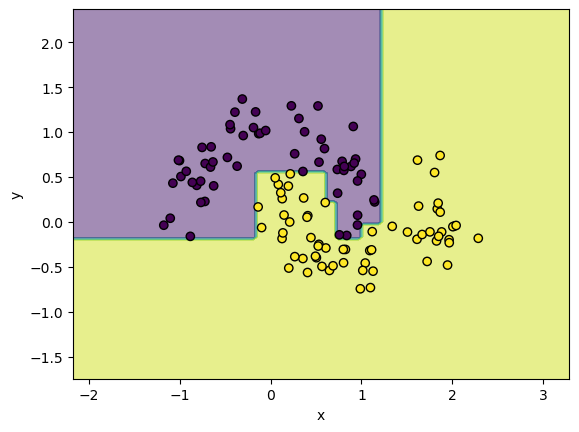

In [10]:
plot_decision_boundary("train")

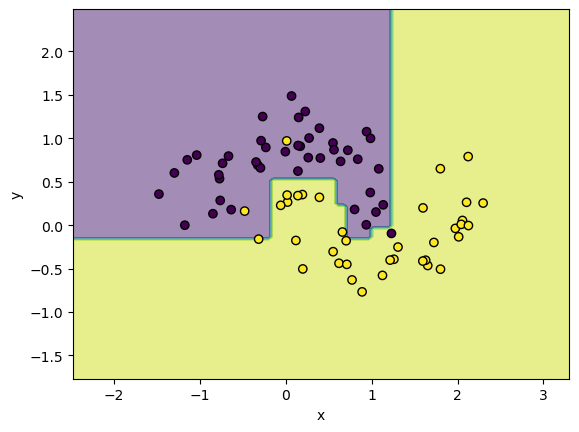

In [11]:
plot_decision_boundary("test")